### Ameya Ghatpande on 09-07-2017
#### Exploratory Data analysis on the eye surgeries Dataset

In [286]:
# <aghatpande> on 07-Sep-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [287]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [289]:
#<aghatpande> on 07-Sep-2017 for EDA
surgeriesDF = pd.read_csv("C:\\Users\\v-amghat\\Documents\\Notebooks\\apple-eye-surgeries.csv")

##### Check the size of data

In [281]:
len(surgeriesDF)

3500

##### Explore the columns

In [282]:
surgeriesDF.columns

Index(['date_of_birth', 'patient_insurance', 'patient_sex', 'success',
       'surgeon_id', 'over_under_correction', 'treatment', 'initial_severity'],
      dtype='object')

##### Check if any columns have NULL values
##### If any column has a NULL/NaN, then check whats the count of these NULL values. 

In [258]:
pd.isnull(surgeriesDF).sum() > 0

date_of_birth            False
patient_insurance         True
patient_sex              False
success                  False
surgeon_id               False
over_under_correction     True
treatment                False
initial_severity         False
dtype: bool

In [290]:
# <aghatpande> on 07-Sep-2017
# Check the number of NULLS in identified columns
pd.isnull(surgeriesDF.patient_insurance).sum()
pd.isnull(surgeriesDF.over_under_correction).sum()

3

2810

##### Since the patient_insurance column has less number of NULLS, lets check the data for this condition

In [291]:
patientInsuranceNullDF = surgeriesDF[surgeriesDF.patient_insurance.isnull() == True]

In [292]:
patientInsuranceNullDF

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity
3168,10/7/89,NaN,Male,True,5,NaN,X,MINOR
3358,6/25/76,NaN,Female,True,19,NaN,Y,MINOR
3483,12/23/95,NaN,Female,True,32,NaN,X,SEVERE


<b> Since there are more NULLS in over_under_correction column, Lets explore it using the describe functionality.
1. Check the possible unique values 


In [294]:
surgeriesDF.over_under_correction.describe()
surgeriesDF.over_under_correction.unique()

count       690
unique        2
top       UNDER
freq        599
Name: over_under_correction, dtype: object

array([nan, 'UNDER', 'OVER'], dtype=object)

### Surprise !! We have few duplicate entries.
### I am assuming if all the columns match, the entry is duplicate. There is less chance that a person with 
1. Same sex
2. Same DOB
3. Has same insurance
4. Is treated by same surgeon
5. Has same initial_severity

In [296]:
duplicateDF = surgeriesDF[surgeriesDF.duplicated() == True]
duplicateDF

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity
1606,4/6/97,D,Female,True,10,NaN,Y,MINOR
2627,3/9/96,C,Male,True,5,NaN,X,SEVERE


##### Lets check one of the duplicate entry

In [297]:
CheckDuplicateEntries = surgeriesDF[((surgeriesDF.date_of_birth == "4/6/97") & (surgeriesDF.surgeon_id == 10))]
CheckDuplicateEntries

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity
1583,4/6/97,D,Female,True,10,NaN,Y,MINOR
1606,4/6/97,D,Female,True,10,NaN,Y,MINOR


##### Lets remove the duplicate entry. Here there are only 2 duplicate entries.

In [298]:
len(surgeriesDF)
nonDuplicateSurgeriesDF = surgeriesDF.drop_duplicates()
len(nonDuplicateSurgeriesDF)

3500

3498

#### Lets check the age wise distribution on patients. Histogram comes to over rescue

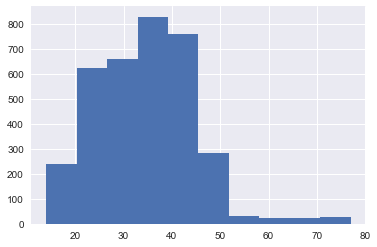

In [542]:
nonDuplicateSurgeriesDF.Age.hist()

#### Let us plot a pie chart of Gender distribution of patients
#### Always a good practise to check the possible values. I found a junk value here. So correcting it

In [301]:
nonDuplicateSurgeriesDF.patient_sex.unique()

array(['Male', 'Female', 'Malle'], dtype=object)

In [302]:
nonDuplicateSurgeriesDF["patient_sex"].replace("Malle", "Male", inplace=True)
nonDuplicateSurgeriesDF.patient_sex.unique()
len(nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.patient_sex == "Female"])
len(nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.patient_sex == "Male"])

C:\Users\v-amghat\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array(['Male', 'Female'], dtype=object)

1404

2094

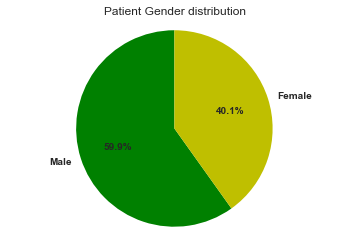

In [308]:
# <aghatpande> on 07-Sep-2017
# Using matplotlib for gender distribution pie chart
fig1, ax1 = plt.subplots()
plt.title("Patient Gender distribution");
plt.pie(nonDuplicateSurgeriesDF["patient_sex"].value_counts().tolist(), colors=["g", "y"], labels=["Male", "Female"], startangle=90, autopct='%.1f%%', textprops={'weight': 'bold'});
ax1.axis('equal');

#### Lets convert date_of_birth to Age (years), so that Age related insights can be calculated

In [349]:
from datetime import datetime as dt
nonDuplicateSurgeriesDF.dtypes
nonDuplicateSurgeriesDF['dob'] = nonDuplicateSurgeriesDF['date_of_birth'].apply(lambda x: dt.strptime(x,'%m/%d/%y'))

date_of_birth            object
patient_insurance        object
patient_sex              object
success                    bool
surgeon_id                int64
over_under_correction    object
treatment                object
initial_severity         object
dob                       int64
dtype: object

C:\Users\v-amghat\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [350]:
# <aghatpande> on 07-Sep-2017
# The newly created column "dob" is now a column of type "DateTime" and so we can extract the year out of it
nonDuplicateSurgeriesDF.dtypes

date_of_birth                    object
patient_insurance                object
patient_sex                      object
success                            bool
surgeon_id                        int64
over_under_correction            object
treatment                        object
initial_severity                 object
dob                      datetime64[ns]
dtype: object

In [351]:
nonDuplicateSurgeriesDF['dob'] = nonDuplicateSurgeriesDF['dob'].apply(lambda x: x.year)

C:\Users\v-amghat\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [352]:
# <aghatpande> on 07-Sep-2017
# This is weird. Some of the dob are coming more than 2017. (Need to explore more on DateTime.year() function)
badDOB = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.dob > dt.now().year]
len(badDOB)
badDOB.head(5)

# <aghatpande> on 07-Sep-2017
# Hack to get things in place :)
nonDuplicateSurgeriesDF["dob"] = nonDuplicateSurgeriesDF.dob.apply(lambda x: x if x < 2017 else x - 2000 + 1900)
len(nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.dob > dt.now().year])

119

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity,dob
26,7/17/68,J,Female,False,6,UNDER,Y,MINOR,2068
73,9/7/55,G,Female,True,4,NaN,X,SEVERE,2055
77,5/20/63,H,Female,True,6,NaN,X,MINOR,2063
117,10/13/54,C,Male,True,13,NaN,X,SEVERE,2054
140,12/27/68,H,Female,True,6,NaN,Y,MINOR,2068


C:\Users\v-amghat\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0

In [356]:
nonDuplicateSurgeriesDF['Age'] = dt.now().year - nonDuplicateSurgeriesDF.dob

In [357]:
nonDuplicateSurgeriesDF['Age'].head(5)
len(nonDuplicateSurgeriesDF)

0    47
1    19
2    43
3    35
4    47
Name: Age, dtype: int64

3498

#### Lets plot the Gender wise + Age wise distribution of patients.
#### This gives us a general idea of for a particular gender what is the most common age of eye surgery

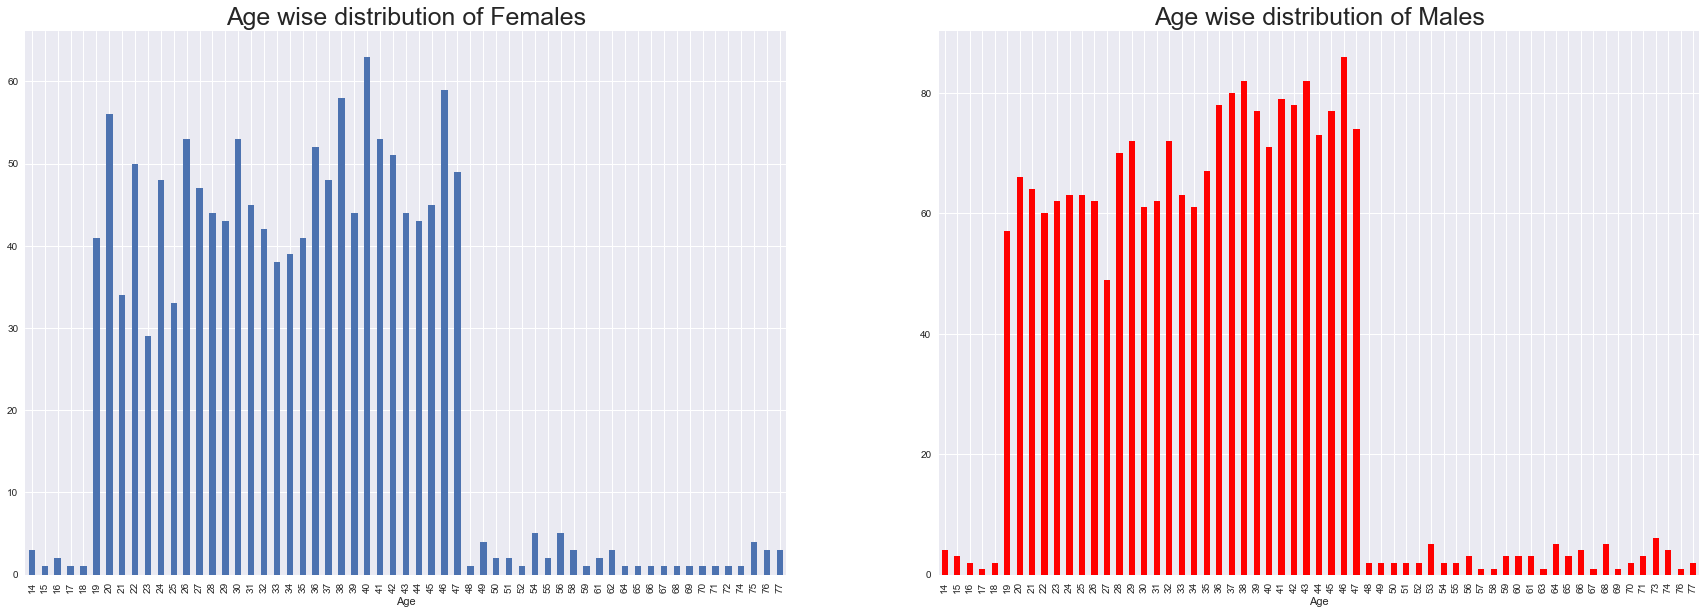

In [383]:
fig, ax = plt.subplots(1, 2, sharey=TrueS);
nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF["patient_sex"] == "Female"].groupby("Age").size().plot(ax = ax[0], kind='bar', title='Age wise distribution of Females', figsize=(30,10), fontsize=10);
nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF["patient_sex"] == "Male"].groupby("Age").size().plot(ax = ax[1], kind='bar', title='Age wise distribution of Males', color="r", figsize=(30,10), fontsize=10);
ax[0].title.set_size(25);
ax[1].title.set_size(25);

#### Lets check Gender wise success numbers
#### Since the Male patients are substantially more, we expect more success (in terms of numbers) in males

In [384]:
# <aghatpande> on 07-Sep-2017
# Sepearate out the Dataframes
femalesDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.patient_sex == "Female"]
malesDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.patient_sex == "Male"]

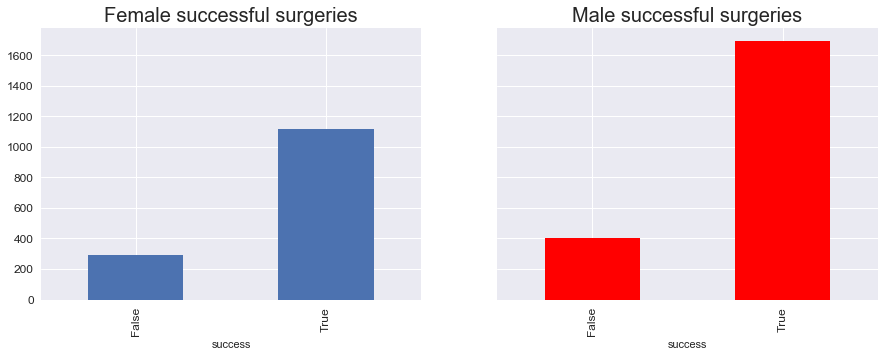

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, sharey=True)
femalesDF.groupby("success").size().plot(kind='bar', ax=ax[0], title='Female successful surgeries', figsize=(15,5), fontsize=12);
malesDF.groupby('success').size().plot(kind='bar', ax=ax[1], title='Male successful surgeries', figsize=(15,5), color="r", fontsize=12);
ax[0].title.set_size(20);
ax[1].title.set_size(20);

#### Lets check the overall success of surgeries (across both genders)
#### Lets also check the percentage of success in individual genders

In [487]:
successDF = nonDuplicateSurgeriesDF[(nonDuplicateSurgeriesDF.success == True)]
failedDF = nonDuplicateSurgeriesDF[(nonDuplicateSurgeriesDF.success == False)]

print("Number of successful surgeries are ", len(successDF))
print("Number of failed surgeries are ", len(failedDF))
print("Success percentage of surgeries is", len(successDF) / len(nonDuplicateSurgeriesDF) * 100)
print("\n")

print ("Total Female patients are ",len(femalesDF))
print ("The Success percentage if females is" ,len(femalesDF[femalesDF.success == True]) / len(femalesDF) * 100)

print("\n")
print ("Total Male patients are ",len(malesDF))
print ("The Success percentage if Males is" ,len(malesDF[malesDF.success == True]) / len(malesDF) * 100)

Number of successful surgeries are  2808
Number of failed surgeries are  690
Success percentage of surgeries is 80.27444253859348


Total Female patients are  1404
The Success percentage if females is 79.34472934472934


Total Male patients are  2094
The Success percentage if Males is 80.89780324737345


#### Lets explore the "Treatment" column.
#### Lets see if any particular type of treatment is more successful than other

In [423]:
nonDuplicateSurgeriesDF.treatment.unique()

treatmentXDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.treatment == "X"]
treatmentYDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.treatment == "Y"]
print("Number of patients treated with X method is", len(treatmentXDF))
print("Number of patients treated with Y method is", len(treatmentYDF))
print("\n")

successfulXTreatments = treatmentXDF[treatmentXDF.success == True]
successfulYTreatments = treatmentYDF[treatmentYDF.success == True]
print("Number of succesful surgeries by X treatments", len(successfulXTreatments))
print("Number of succesful surgeries by Y treatments", len(successfulYTreatments))
print("\n")

print("Success percentage of X treatment is", len(successfulXTreatments)/len(treatmentXDF)*100 )
print("Success percentage of Y treatment is", len(successfulYTreatments)/len(treatmentYDF)*100 )

array(['X', 'Y'], dtype=object)

Number of patients treated with X method is 1749
Number of patients treated with Y method is 1749


Number of succesful surgeries by X treatments 1364
Number of succesful surgeries by Y treatments 1444


Success percentage of X treatment is 77.9874213836478
Success percentage of Y treatment is 82.56146369353917


#### Lets explore the initial_severity column and success ratio

In [431]:
nonDuplicateSurgeriesDF.initial_severity.unique()
minorSeverityDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.initial_severity == "MINOR"]
severeSeverityDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.initial_severity == "SEVERE"]
print("Total number of Minor initial_severity cases", len(minorSeverityDF))
print("Total number of Severe initial_severity cases", len(severeSeverityDF))
print("\n")

successfulMinorSurgeriesDF = successDF[successDF.initial_severity == "MINOR"]
successfulSevereSurgeriesDF = successDF[successDF.initial_severity == "SEVERE"]
print("Total number of successful minor surgeries", len(successfulMinorSurgeriesDF))
print("Total number of successful severe surgeries", len(successfulSevereSurgeriesDF))
print("\n")

print("Sucess percentage of minor severity cases",len(successfulMinorSurgeriesDF)/len(minorSeverityDF) *100  )
print("Sucess percentage of severe severity cases",len(successfulSevereSurgeriesDF)/len(severeSeverityDF) *100  )

array(['MINOR', 'SEVERE'], dtype=object)

Total number of Minor initial_severity cases 1784
Total number of Severe initial_severity cases 1714


Total number of successful minor surgeries 1574
Total number of successful severe surgeries 1234


Sucess percentage of minor severity cases 88.2286995515695
Sucess percentage of severe severity cases 71.9953325554259


#### Lets check if there is any relation (correlation) between Insurance type and success
#### No distictive characteristic is visible

In [577]:
successDF.groupby("patient_insurance").size().sort_values(ascending=False)

patient_insurance
I    311
C    299
B    281
J    278
G    277
E    276
H    275
A    274
F    271
D    263
dtype: int64

In [578]:
failedDF.groupby("patient_insurance").size().sort_values(ascending=False)

patient_insurance
I    77
B    77
A    76
E    74
C    72
G    71
D    66
F    63
J    58
H    56
dtype: int64

#### Lets check who is our rock star surgeon and who are the bad performers

In [524]:
print("The top 10 surgeons who have performed the most number of surgeries are")
nonDuplicateSurgeriesDF.groupby("surgeon_id").size().sort_values(ascending=False).head(10)

print("\n")
print("The top 10 surgeons with highest number of successful surgeries")
successDF.groupby("surgeon_id").size().sort_values(ascending=False).head(10)

print("\n")
print("The top 10 surgeons with highest success rate")
(successDF.groupby("surgeon_id").size() / nonDuplicateSurgeriesDF.groupby("surgeon_id").size()*100).sort_values(ascending=False).head(10)

print("\n")
print("The top 10 surgeons with the highest failure rate")
print("Note that surgeon_id 6 is one of the bad performers")
(failedDF.groupby("surgeon_id").size() / nonDuplicateSurgeriesDF.groupby("surgeon_id").size()*100).sort_values(ascending=False).head(10)

The top 10 surgeons who have performed the most number of surgeries are


surgeon_id
6     593
10    245
5     214
13    209
17    202
20    199
30    194
32    192
8     190
18    186
dtype: int64



The top 10 surgeons with highest number of successful surgeries


surgeon_id
6     411
10    221
5     178
17    172
13    169
20    163
18    162
32    157
8     152
30    128
dtype: int64



The top 10 surgeons with highest success rate


surgeon_id
24    100.000000
22    100.000000
28     92.857143
10     90.204082
43     88.461538
3      87.209302
18     87.096774
7      86.363636
4      86.153846
17     85.148515
dtype: float64



The top 10 surgeons with the highest failure rate
Note that surgeon_id 6 is one of the bad performers


surgeon_id
0     100.000000
30     34.020619
41     33.333333
6      30.691400
25     21.118012
21     20.000000
8      20.000000
13     19.138756
19     18.620690
32     18.229167
dtype: float64

## Backup code for insights

In [468]:
nonDuplicateSurgeriesDF.head(5)

,date_of_birth,patient_insurance,patient_sex,success,surgeon_id,over_under_correction,treatment,initial_severity,dob,Age
0,3/14/70,D,Male,True,18,NaN,X,MINOR,1970,47
1,10/23/98,I,Male,True,17,NaN,Y,MINOR,1998,19
2,7/25/74,A,Male,True,8,NaN,Y,MINOR,1974,43
3,11/6/82,D,Male,True,8,NaN,X,MINOR,1982,35
4,7/24/70,B,Male,True,9,NaN,Y,SEVERE,1970,47


In [471]:
nonDuplicateSurgeriesDF.patient_insurance.describe()

count     3495
unique      10
top          I
freq       388
Name: patient_insurance, dtype: object

In [473]:
len(nonDuplicateSurgeriesDF.surgeon_id.unique())

28

In [478]:
len(nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.initial_severity == "MINOR"])

1784

In [477]:
len(nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.initial_severity == "SEVERE"])

1714

In [476]:
len(nonDuplicateSurgeriesDF)

3498

In [485]:
nonDuplicateSurgeriesDF[["Age", "patient_sex", "success"]].sort("Age").head(3)

C:\Users\v-amghat\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Age,patient_sex,success
3322,14,Female,True
2239,14,Male,True
287,14,Female,True


In [484]:
nonDuplicateSurgeriesDF[["Age", "patient_sex", "success"]].sort("Age", ascending= False).head(3)

C:\Users\v-amghat\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Age,patient_sex,success
592,77,Male,True
710,77,Female,True
3059,77,Male,True


In [494]:
femalesDF.Age.mean()

34.418803418803421

In [495]:
malesDF.Age.mean()

34.681470869149955

In [496]:
nonDuplicateSurgeriesDF.Age.mean()

34.576043453401944

In [522]:
len(nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.surgeon_id == 30])
len(nonDuplicateSurgeriesDF[((nonDuplicateSurgeriesDF.surgeon_id == 30) & (nonDuplicateSurgeriesDF.success== False))])

194

66

In [500]:
successDF.groupby("treatment").size()

treatment
X    1364
Y    1444
dtype: int64

In [505]:
len(successDF)

2808

In [506]:
severeDF = successDF[successDF.initial_severity == "SEVERE"]
len(severeDF)

1234

In [561]:
youngAdultsSurgeriesDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.Age <= 25]
len(youngAdultsSurgeriesDF)
youngAdultsSurgeriesSuccessDF = youngAdultsSurgeriesDF[youngAdultsSurgeriesDF.success == True]
len(youngAdultsSurgeriesSuccessDF)
len(youngAdultsSurgeriesSuccessDF) / len(youngAdultsSurgeriesDF) * 100
adultSurgeriesDF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.Age > 25]
len(adultSurgeriesDF)
adultSurgeriesSuccessDF = adultSurgeriesDF[adultSurgeriesDF.success == True]
len(adultSurgeriesSuccessDF)
len(adultSurgeriesSuccessDF) / len(adultSurgeriesDF) * 100

746

608

81.50134048257372

2752

2200

79.94186046511628

In [562]:
youngAdultsSurgeriesSuccessDF.groupby("surgeon_id").size().sort_values(ascending = False)

surgeon_id
10    58
6     58
5     55
20    43
18    40
13    39
32    39
17    34
4     30
19    29
8     27
9     24
30    23
25    19
16    18
11    15
12    14
3     14
21     7
31     6
7      6
2      4
22     2
43     2
41     1
24     1
dtype: int64

In [563]:
youngAdultsSurgeriesDF.groupby("surgeon_id").size().sort_values(ascending = False)

surgeon_id
6     86
10    63
5     62
20    51
13    47
32    44
18    43
17    41
8     40
30    37
19    34
4     33
25    29
9     27
16    21
12    18
11    17
3     16
21    10
31     7
7      6
2      6
43     3
22     2
41     1
24     1
28     1
dtype: int64

In [568]:
print("The top 5 surgeons who should be assigned young patients (less than 25 years age) are")
(youngAdultsSurgeriesSuccessDF.groupby("surgeon_id").size().sort_values(ascending = False).head(10) / youngAdultsSurgeriesDF.groupby("surgeon_id").size().sort_values(ascending = False).head(10)*100).sort_values(ascending = False).head(5)

The top 5 surgeons who should be assigned young patients (less than 25 years age) are


surgeon_id
18    93.023256
10    92.063492
5     88.709677
32    88.636364
20    84.313725
dtype: float64

In [575]:
surgeon22DF = nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.surgeon_id == 22]
len(surgeon22DF)
surgeon22DF.groupby("initial_severity").size()

11

initial_severity
MINOR     9
SEVERE    2
dtype: int64

In [569]:
nonDuplicateSurgeriesDF.over_under_correction.unique()

array([nan, 'UNDER', 'OVER'], dtype=object)

In [570]:
nonDuplicateSurgeriesDF.patient_insurance.unique()

array(['D', 'I', 'A', 'B', 'G', 'F', 'J', 'C', 'H', 'E', nan], dtype=object)

In [596]:
#successfulMinorSurgeriesDF.groupby("surgeon_id").size().sort_values(ascending=False)
print("Top 5 surgeons for Minor surgeries")
(successfulMinorSurgeriesDF.groupby("surgeon_id").size() / minorSeverityDF.groupby("surgeon_id").size()*100).sort_values(ascending=False).head(10)

Top 5 surgeons for Minor surgeries


surgeon_id
43    100.000000
22    100.000000
41    100.000000
10     97.826087
16     96.078431
31     95.238095
4      92.753623
3      92.682927
8      92.222222
12     91.428571
dtype: float64

In [597]:
#successfulSevereSurgeriesDF.groupby("surgeon_id").size().sort_values(ascending=False)
print("Top 5 surgeons for Major surgeries")
(successfulSevereSurgeriesDF.groupby("surgeon_id").size() / severeSeverityDF.groupby("surgeon_id").size()*100).sort_values(ascending=False).head(10)

Top 5 surgeons for Major surgeries


surgeon_id
24    100.000000
28    100.000000
22    100.000000
7      95.833333
9      86.000000
2      85.714286
18     84.883721
17     83.035714
3      82.222222
10     80.373832
dtype: float64

In [586]:
#nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.surgeon_id == 24]

In [587]:
#nonDuplicateSurgeriesDF[nonDuplicateSurgeriesDF.surgeon_id == 43]